In [1]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  c:\Users\T\Desktop\Temp\5_Flower_Types_Classification_Generator


In [3]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [4]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)


Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[0.13556702, 0.33463147, 0.03831692],
         [0.27703184, 0.37925977, 0.17626981],
         [0.65127224, 0.6329477 , 0.53351337],
         ...,
         [0.01176471, 0.07843138, 0.03921569],
         [0.01176471, 0.07843138, 0.03921569],
         [0.01176471, 0.07843138, 0.03921569]],

        [[0.1582978 , 0.33726245, 0.06168045],
         [0.176009  , 0.3033561 , 0.08820595],
         [0.23320626, 0.267723  , 0.13649859],
         ...,
         [0.01259082, 0.07925748, 0.0400418 ],
         [0.01176471, 0.07843138, 0.03921569],
         [0.01176471, 0.07843138, 0.03921569]],

        [[0.15964577, 0.34335768, 0.07020291],
         [0.1413505 , 0.34359956, 0.07822365],
         [0.16995421, 0.29592934, 0.0946499 ],
         ...,
         [0.01484836, 0.08151503, 0.04229934],
         [0.01346315, 0.08012982, 0.04091413],
         [0.01207794, 0.07874461, 0.03952892]],

        ...,

        [[0.0509804 , 0.15294118, 0.03921569],
         [0.0509804 , 0.15294118, 0.03921569

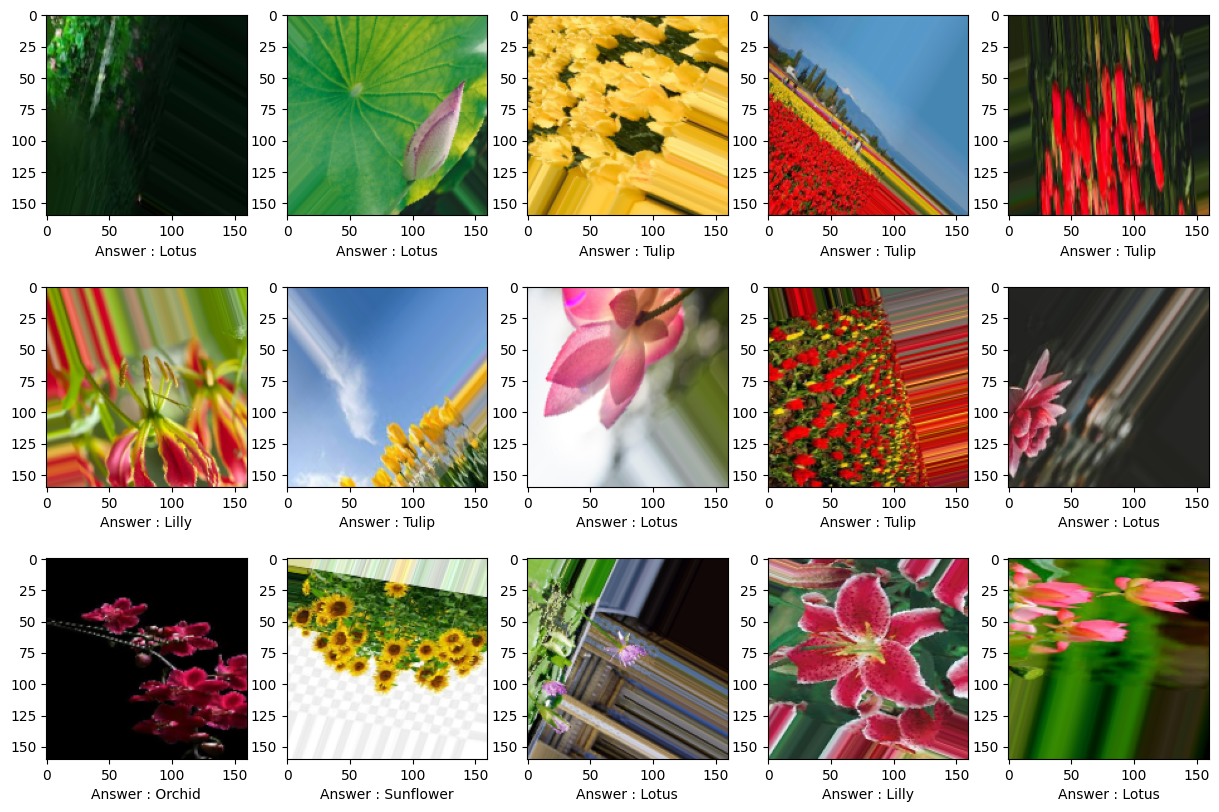

In [5]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [6]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 64)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.1))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.4))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.4))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 409600)            0         
                                                                 
 dense (Dense)               (None, 50)                20480050  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                        

In [7]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N02-1_size160_conv1-64_den1-50_epo15_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [8]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=15, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/15
120/120 [==============================] - ETA: 0s - loss: 2.1045 - accuracy: 0.3888

C:\Users\T\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 308s 3s/step - loss: 2.1045 - accuracy: 0.3888 - val_loss: 1.3167 - val_accuracy: 0.4874
Epoch 2/15
120/120 [==============================] - 296s 2s/step - loss: 1.3289 - accuracy: 0.4523 - val_loss: 1.2595 - val_accuracy: 0.5230
Epoch 3/15
120/120 [==============================] - 297s 2s/step - loss: 1.2747 - accuracy: 0.4897 - val_loss: 1.1632 - val_accuracy: 0.5585
Epoch 4/15
120/120 [==============================] - 285s 2s/step - loss: 1.2233 - accuracy: 0.5056 - val_loss: 1.2136 - val_accuracy: 0.5156
Epoch 5/15
 34/120 [=======>......................] - ETA: 3:07 - loss: 1.2220 - accuracy: 0.5193

KeyboardInterrupt: 

In [ ]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


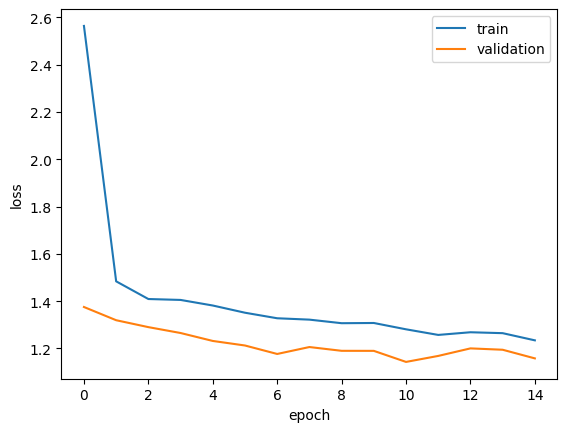

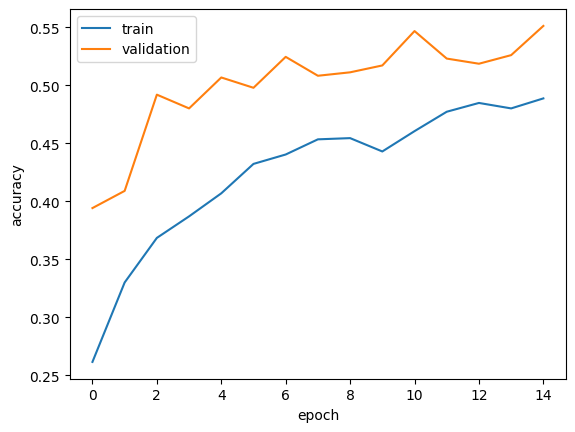

In [ ]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 3s 212ms/step - loss: 1.1190 - accuracy: 0.5420


[1.1190491914749146, 0.5419999957084656]

16/16 [==============================] - 3s 207ms/step
[0.32363462 0.18211411 0.2456998  0.04165664 0.20689479]
500
(array([[[[0.36078432, 0.3647059 , 0.38431376],
         [0.36078432, 0.3647059 , 0.38431376],
         [0.3647059 , 0.36862746, 0.38431376],
         ...,
         [0.8235295 , 0.86666673, 0.8745099 ],
         [0.81568635, 0.8588236 , 0.86666673],
         [0.8078432 , 0.85098046, 0.86666673]],

        [[0.36078432, 0.37647063, 0.38823533],
         [0.36078432, 0.37647063, 0.38823533],
         [0.36078432, 0.37647063, 0.38823533],
         ...,
         [0.8352942 , 0.8745099 , 0.882353  ],
         [0.82745105, 0.86666673, 0.8745099 ],
         [0.8196079 , 0.8588236 , 0.86666673]],

        [[0.36862746, 0.38431376, 0.38823533],
         [0.37254903, 0.38823533, 0.3921569 ],
         [0.37254903, 0.38823533, 0.3921569 ],
         ...,
         [0.82745105, 0.86666673, 0.8705883 ],
         [0.81568635, 0.854902  , 0.8588236 ],
         [0.8078432 , 0.8470589 , 0.85

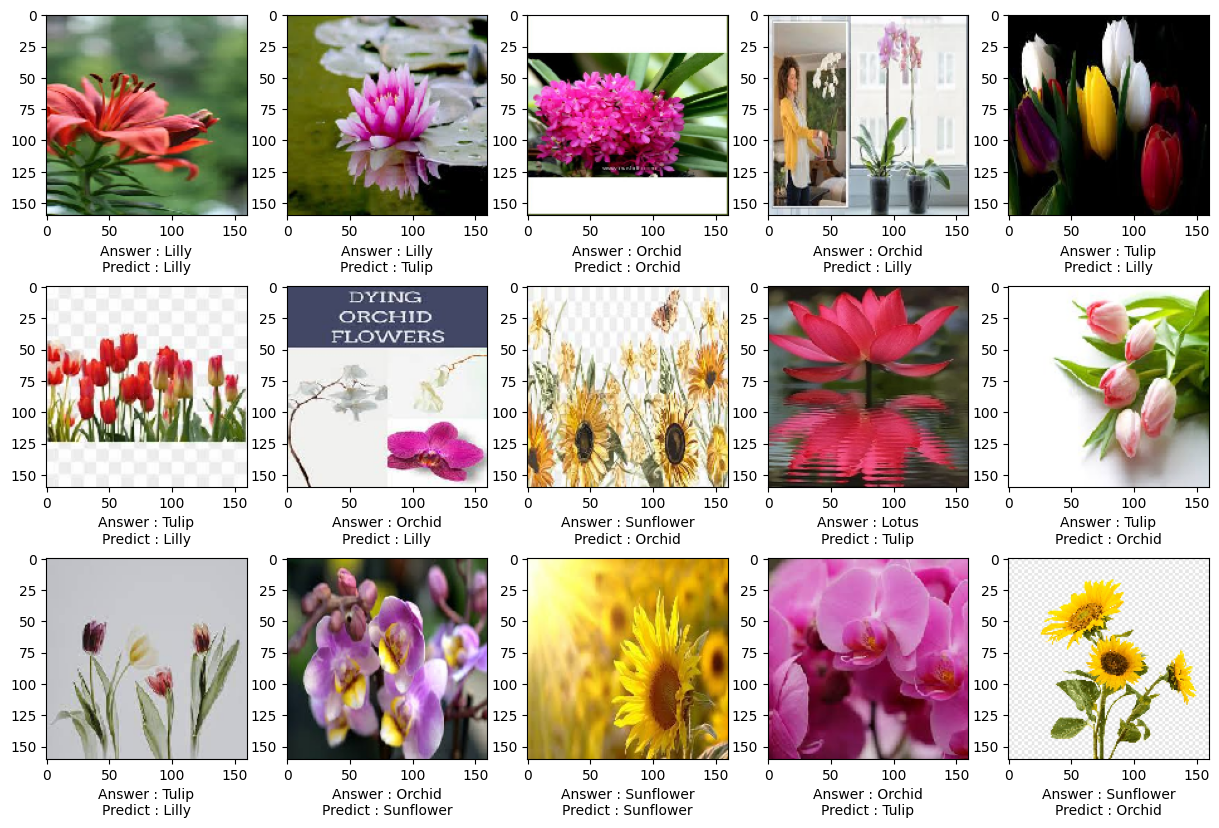

In [ ]:
# test 평가 확인
pred = model.predict(test_gen)
print(pred[0])
print(len(pred))

test_batch = next(test_gen)

print(test_batch)
print()

test_images, test_labels = test_batch

print(len(test_images))
print()
print(len(test_labels))
print()
print(test_labels)

# test 평가 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(test_images[i])
    plt.xlabel(f'Answer : {labels_dict[np.argmax(test_labels[i])]}' + '\n'+  'Predict : '+ labels_dict[np.argmax(pred[i])])
plt.show()
